# estimate the c.m. width of two protons in swimming in the Fermi sea

In [4]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
from scipy import optimize
import matplotlib.mlab as mlab
import matplotlib.patches as patches
%matplotlib inline

In [60]:
# --- - -- ---- - -- ---- - -- ---- - -- -
# June-17,2018
# generate a 3-vector randomly in a sphere of radius r
def generate_in_sphere(r=1,return_type='(x,y,z)'):
    R = np.random.uniform(0,r)
    cos_theta = np.random.uniform(-1,1)
    theta = np.arccos(cos_theta)
    sin_theta = np.sqrt(1 - np.square(cos_theta))
    phi = np.random.uniform(0,2*np.pi)
    
    x = R*sin_theta*np.cos(phi)
    y = R*sin_theta*np.sin(phi)
    z = R*cos_theta
    if return_type=='(x,y,z)':
        return np.array([x,y,z])
    elif return_type=='(x,y,z,r,theta,phi)':
        return np.array([x,y,z,R,theta,phi])        
# --- - -- ---- - -- ---- - -- ---- - -- -



In [84]:
# hyperparameters
Nevents = 5000
kF_array = linspace(200,300,11) # MeV/c

In [85]:
# main for loop
results = pd.DataFrame(columns=['kF','sigma_cm_x','sigma_cm_y','sigma_cm_z'])
results_kF_dict = dict()
for kF in kF_array:
    print 'running kF=',kF,'MeV/c'
    results_kF = pd.DataFrame(columns=['P1_x','P1_y','P1_z'
                                ,'P2_x','P2_y','P2_z'
                                ,'Pcm_x','Pcm_y','Pcm_z'])
    for event in range(Nevents):

        P1 = generate_in_sphere( r=kF , return_type='(x,y,z,r,theta,phi)')
        P2 = generate_in_sphere( r=kF , return_type='(x,y,z,r,theta,phi)')
        Pcm = P1 + P2

        results_kF = results_kF.append(pd.DataFrame({'P1_x':P1[0],'P1_y':P1[1],'P1_z':P1[2],'P1':P1[3],'P1_theta':P1[4],'P1_phi':P1[5]
                                           ,'P2_x':P2[0],'P2_y':P2[1],'P2_z':P2[2],'P2':P2[3],'P2_theta':P2[4],'P2_phi':P2[5]
                                           ,'Pcm_x':Pcm[0],'Pcm_y':Pcm[1],'Pcm_z':Pcm[2],'Pcm':np.sqrt(np.sum(np.square(Pcm)))}
                                          ,index=[event]))
    results_kF_dict[kF] = results_kF
    sigma_cm_x = np.std(results_kF['Pcm_x'])
    sigma_cm_y = np.std(results_kF['Pcm_y'])
    sigma_cm_z = np.std(results_kF['Pcm_z'])
    results = results.append(pd.DataFrame({'kF':kF,'sigma_cm_x':sigma_cm_x,'sigma_cm_y':sigma_cm_y,'sigma_cm_z':sigma_cm_y},index=[kF]))
    print 'done with kF=',kF,'MeV/c'
    
print 'done'

running kF= 200.0 MeV/c
done with kF= 200.0 MeV/c
running kF= 210.0 MeV/c
done with kF= 210.0 MeV/c
running kF= 220.0 MeV/c
done with kF= 220.0 MeV/c
running kF= 230.0 MeV/c
done with kF= 230.0 MeV/c
running kF= 240.0 MeV/c
done with kF= 240.0 MeV/c
running kF= 250.0 MeV/c
done with kF= 250.0 MeV/c
running kF= 260.0 MeV/c
done with kF= 260.0 MeV/c
running kF= 270.0 MeV/c
done with kF= 270.0 MeV/c
running kF= 280.0 MeV/c
done with kF= 280.0 MeV/c
running kF= 290.0 MeV/c
done with kF= 290.0 MeV/c
running kF= 300.0 MeV/c
done with kF= 300.0 MeV/c
done


saved /Users/erezcohen/Desktop/sigma_t_vs_kF.pdf


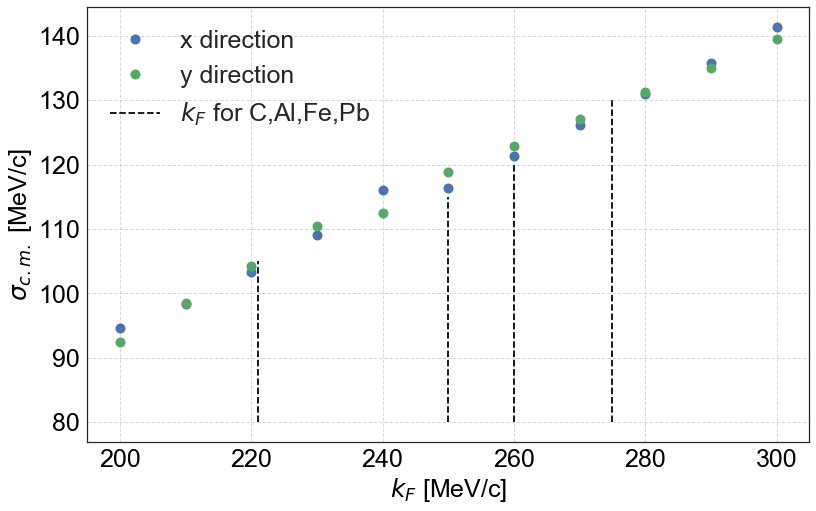

In [86]:
fig,ax=plt.subplots(figsize=(12.944,8))
for direction in ['x','y']:
    plt.plot(results['kF'],results['sigma_cm_'+direction],'o',markersize=10
             ,label=direction+' direction')
plt.plot([221,221],[80,105],'--',
         [250,250],[80,115],'--',
         [260,260],[80,120],'--',
         [275,275],[80,130],'--',
         color='black',label='$k_F$ for C,Al,Fe,Pb')
set_axes(ax,r'$k_F$ [MeV/c]',r'$\sigma_{c.m.}$ [MeV/c]',do_add_grid=True,do_add_legend=True)
filename='/Users/erezcohen/Desktop/sigma_t_vs_kF.pdf'
plt.savefig(filename)
print 'saved',filename

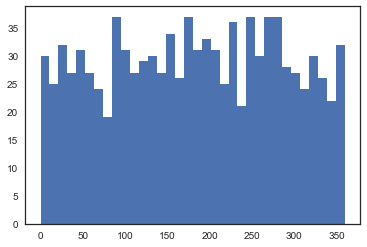

In [68]:
# plt.hist(results_kF_dict[220]['P2'],bins=linspace(0,220,35));
plt.hist(180/np.pi*results_kF_dict[220]['P2_phi'],bins=linspace(0,360,35));


95.1120584642


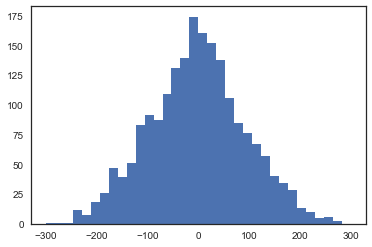

In [36]:
plt.hist(results['Pcm_y'],bins=linspace(-300,300,35));
sigma_y = np.std(results['Pcm_y'])
print sigma_y

In [ ]:
plt.hist(results['P1_y'],bins=linspace(-200,200,35));